<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Random Forest - Régression
## Plus : Une analyse supplémentaire de diverses méthodes de régression !

## Les Données

Nous venons d'être engagés par une entreprise de forage de tunnels qui utilise les rayons X pour tenter de connaître la densité de la roche. Idéalement, cela leur permettra de changer les têtes de forage de leur équipement avant de devoir creuser la roche !

<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/boring.jpg" width=400>

Ils nous ont donné les résultats de tests en laboratoire de l'intensité du signal renvoyé en nHz à leurs capteurs pour différents types de densité de roche testés. Vous remarquerez qu'il y a presque une relation sinusoïdale, où la force du signal oscille en fonction de la densité. Les chercheurs ne savent pas exactement pourquoi...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal','Density']

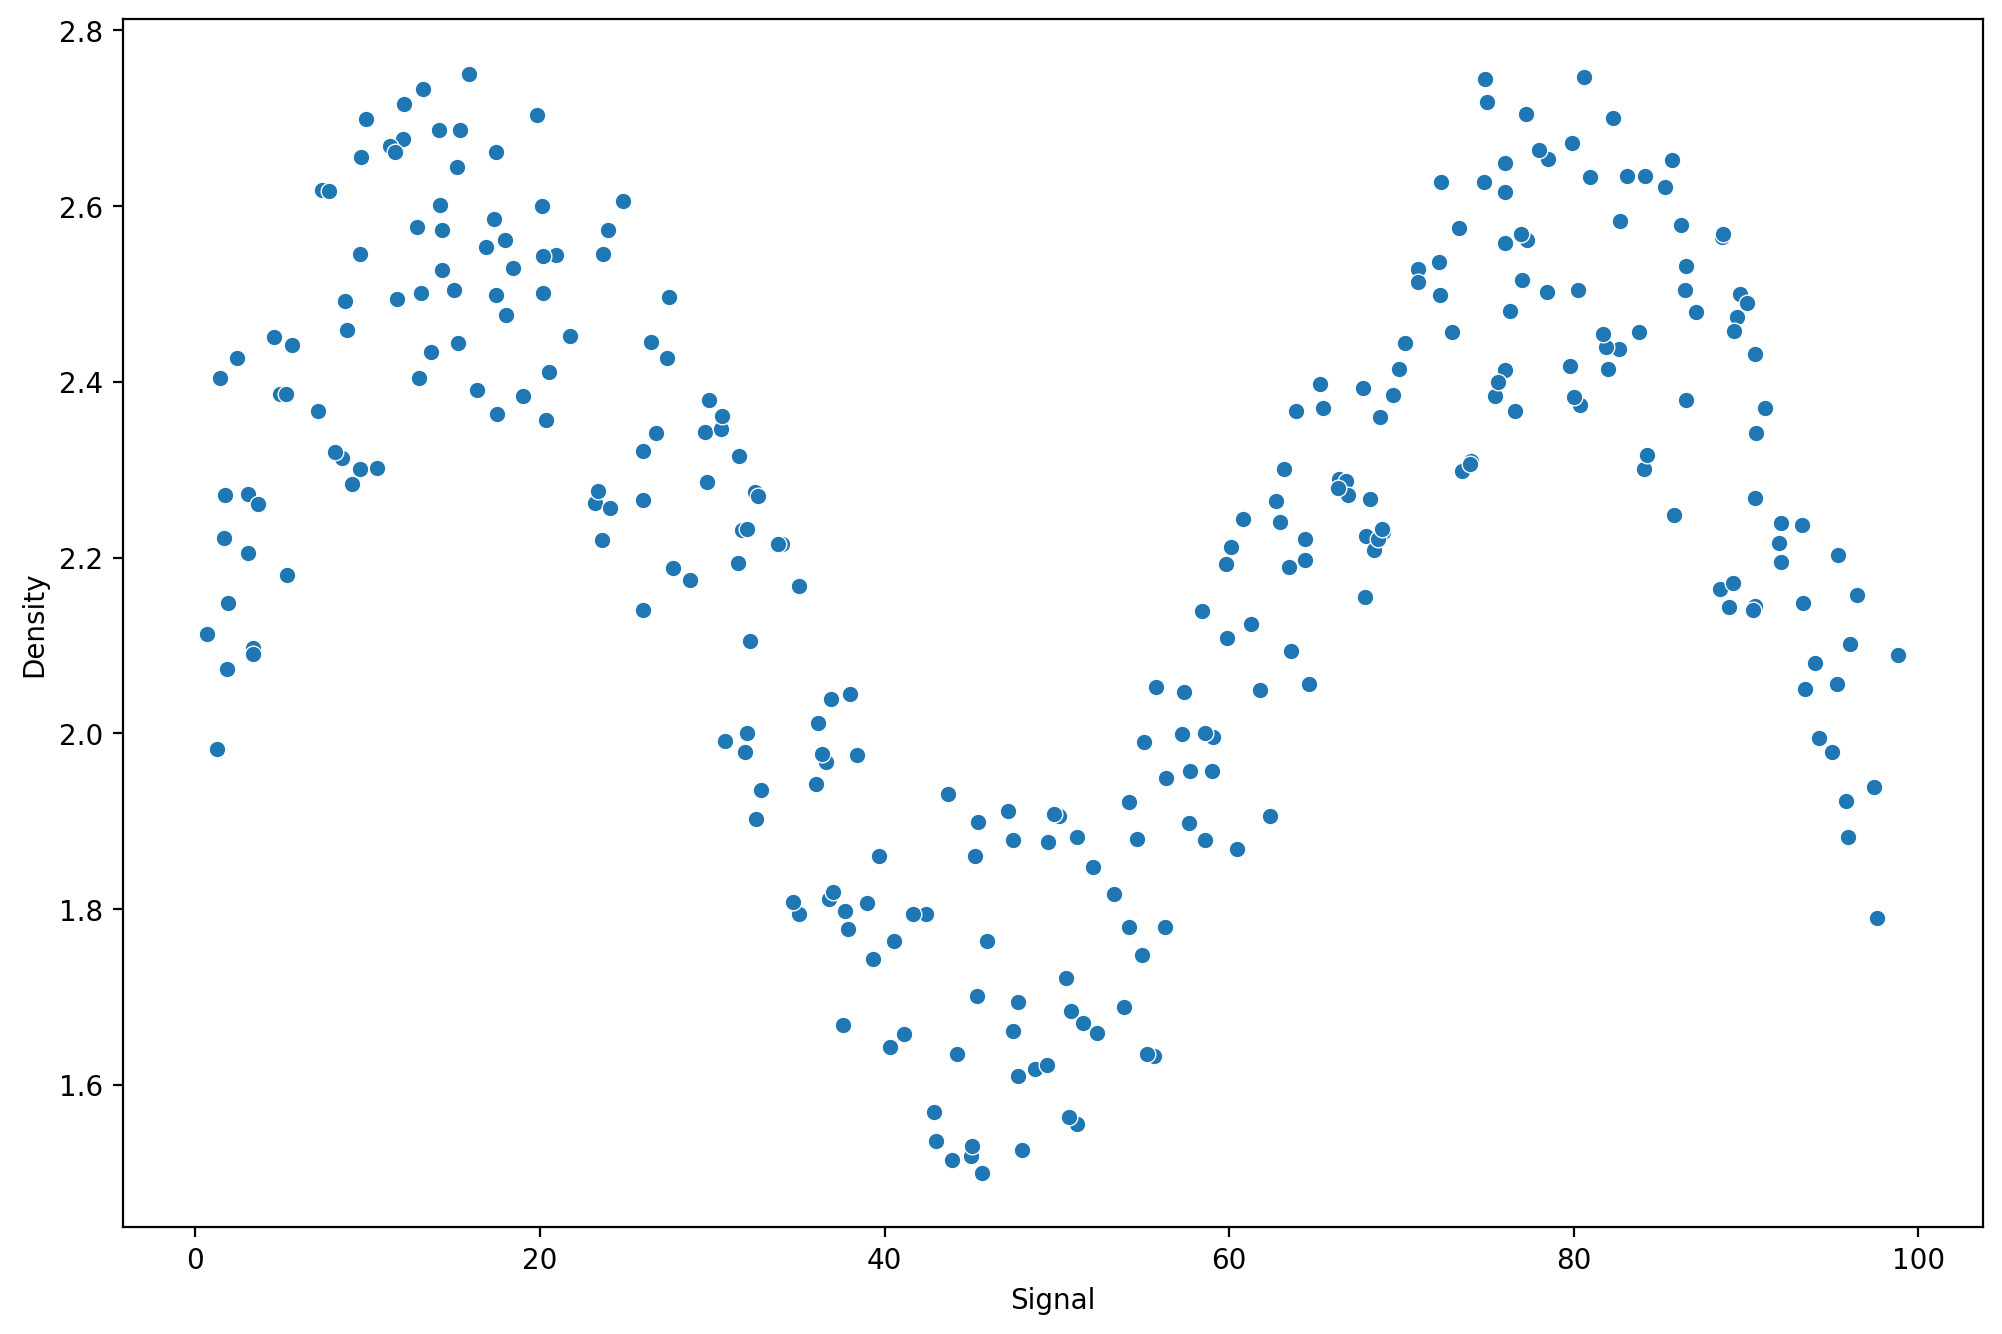

In [5]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df);

## Fractionnement des Données

Divisons les données afin de disposer d'un ensemble de tests pour l'évaluation des mesures de performance.

In [6]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Régression Linéaire

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()

In [11]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
lr_preds = lr_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

À quoi ressemble l'ajustement ?

In [15]:
signal_range = np.arange(0,100)

In [16]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

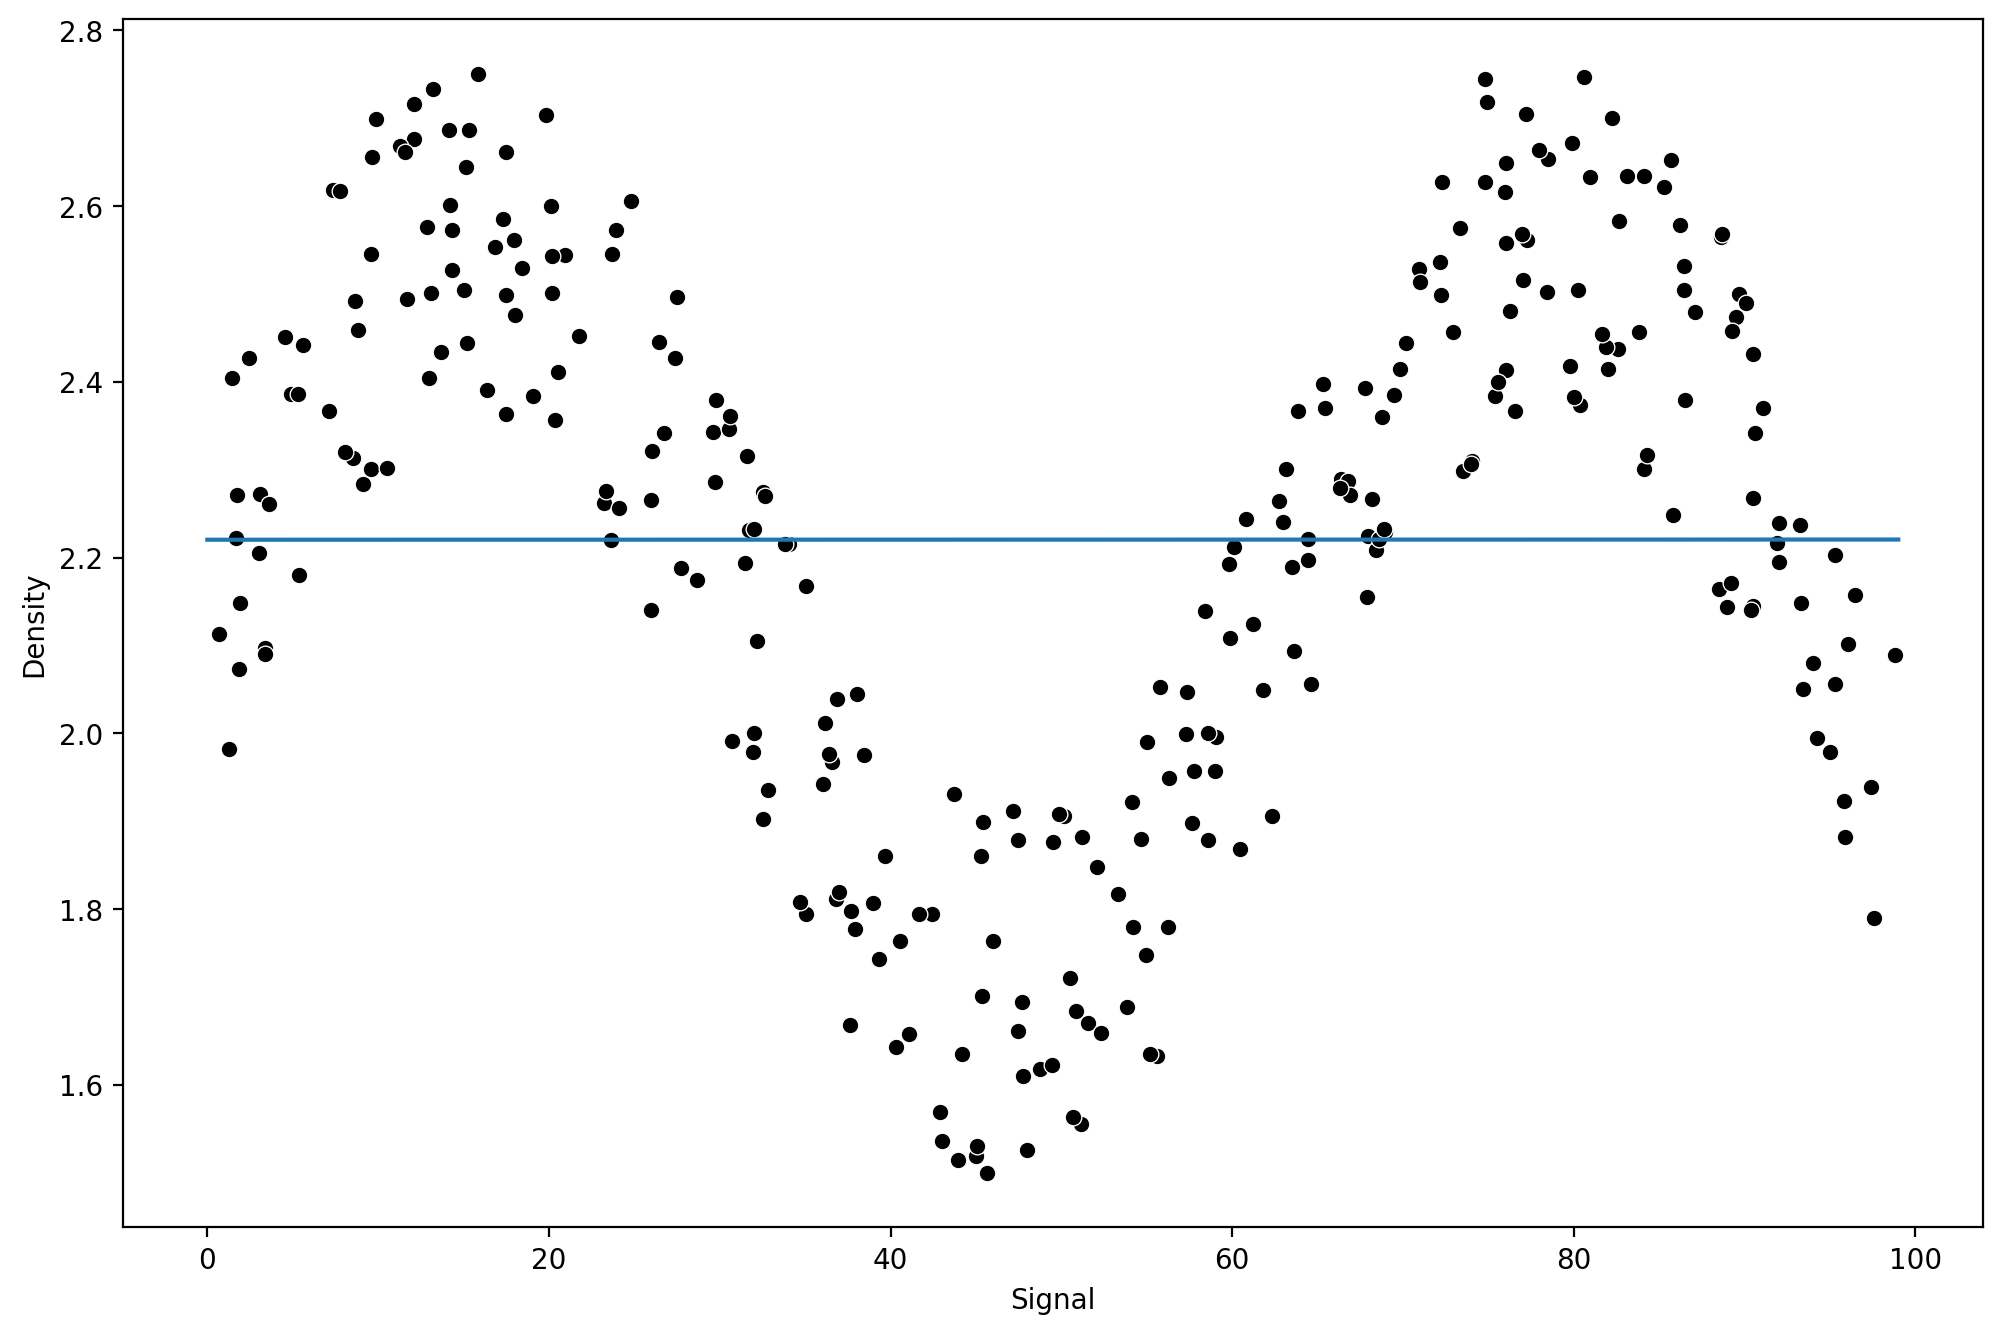

In [18]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df, color='black')
plt.plot(signal_range, lr_output);

# Régression Polynomiale

## Tentative avec un modèle de régression polynomiale

Explorons les raisons pour lesquelles notre approche de régression standard d'un polynôme pourrait être difficile à adapter ici, en gardant à l'esprit que nous sommes dans une situation privilégiée où nous pouvons facilement visualiser les résultats de y en fonction de x.

## Fonction d'aide à l'exécution des modèles

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Entraînement / Ajustement du modèle
    model.fit(X_train, y_train)
    
    # Obtenir les metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RMSE : {rmse}')
    
    # Tracer les résultats
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6), dpi=150)
    sns.scatterplot(x='Signal',y='Density', data=df, color='black')
    plt.plot(signal_range, output)

RMSE : 0.2570051996584629


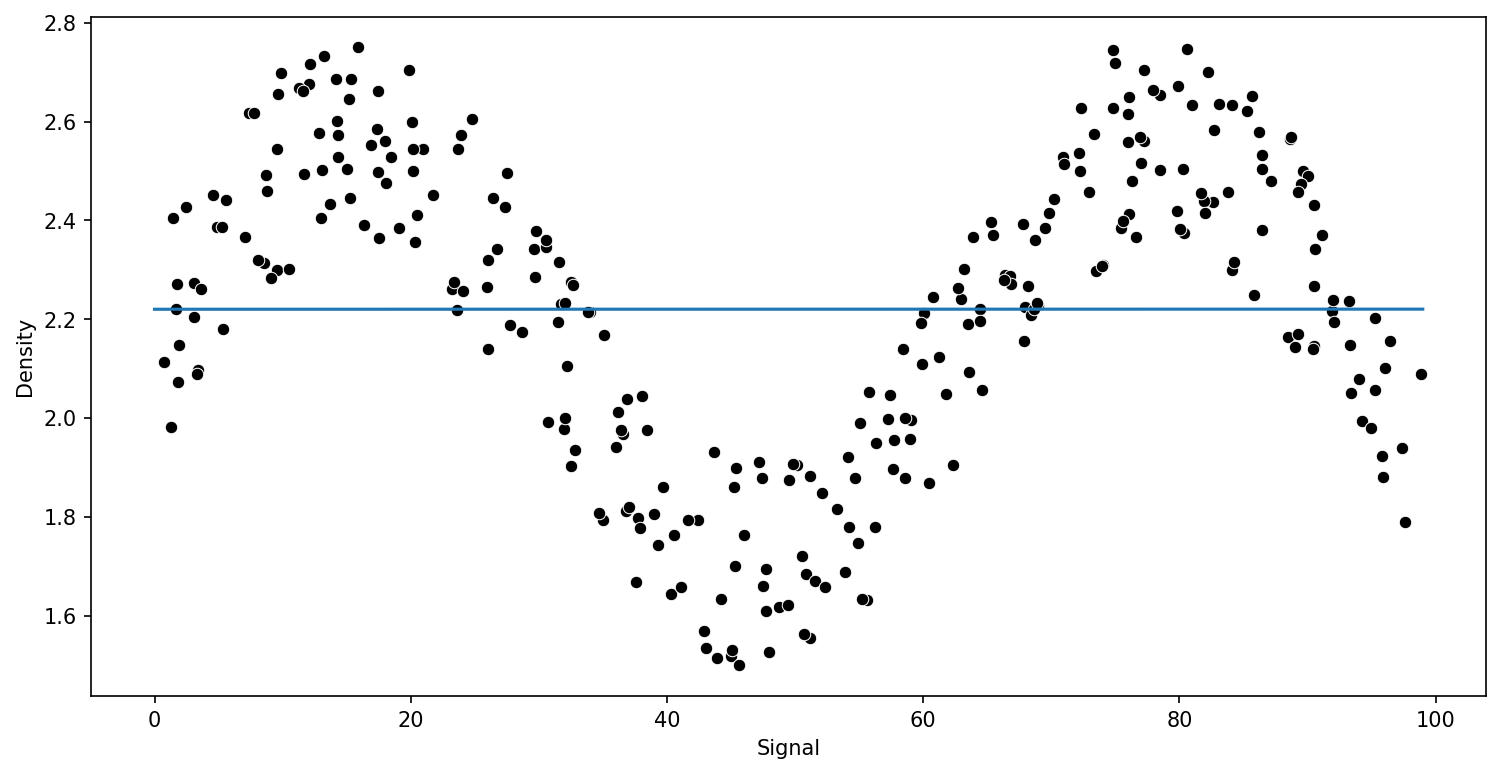

In [21]:
run_model(model, X_train, y_train, X_test, y_test)

## Pipeline pour les ordres polynomiaux

In [22]:
from sklearn.pipeline import make_pipeline

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())

RMSE : 0.2817309563725596


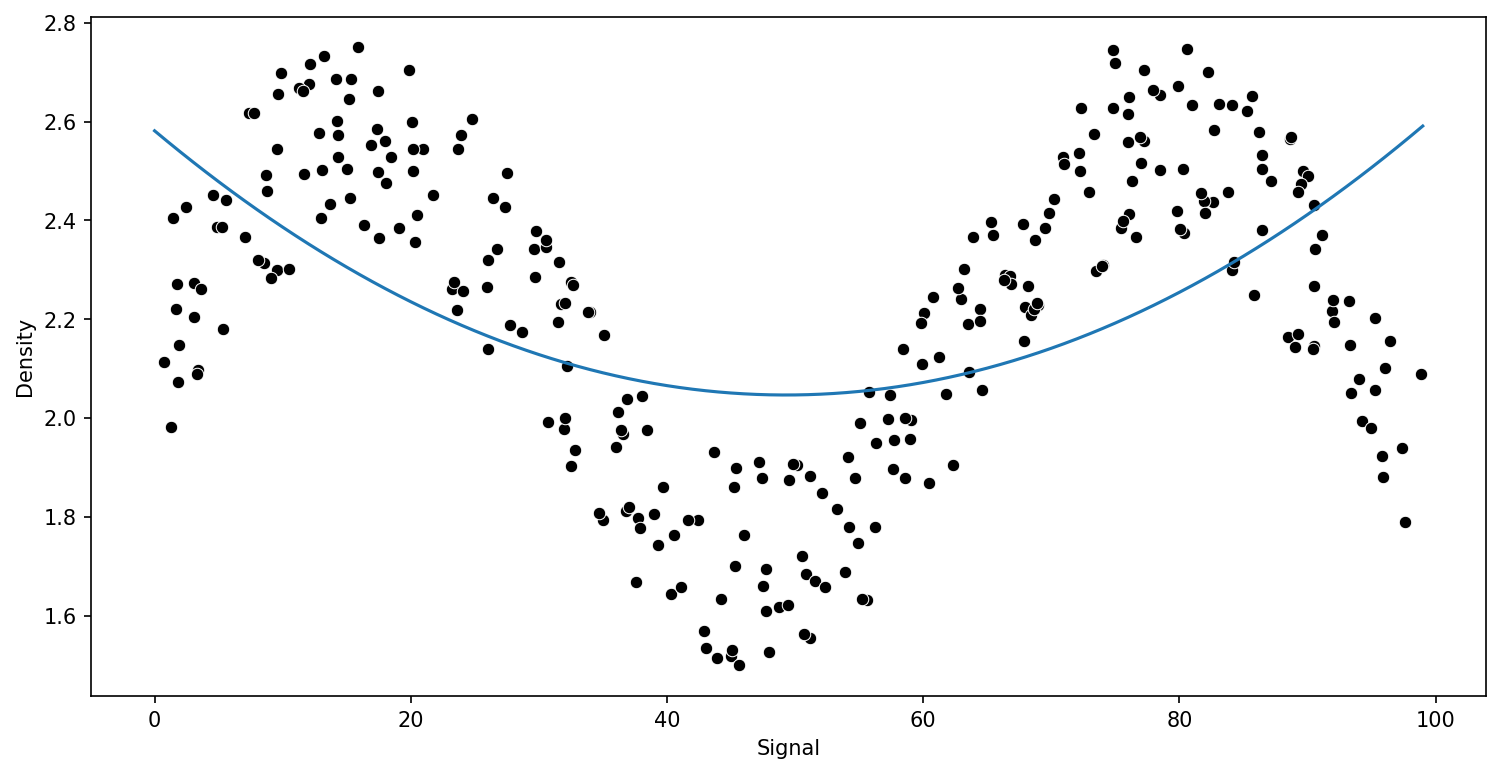

In [25]:
run_model(pipe, X_train, y_train, X_test, y_test)

## Comparaison de différents ordres polynomiaux

RMSE : 0.14078766602101847


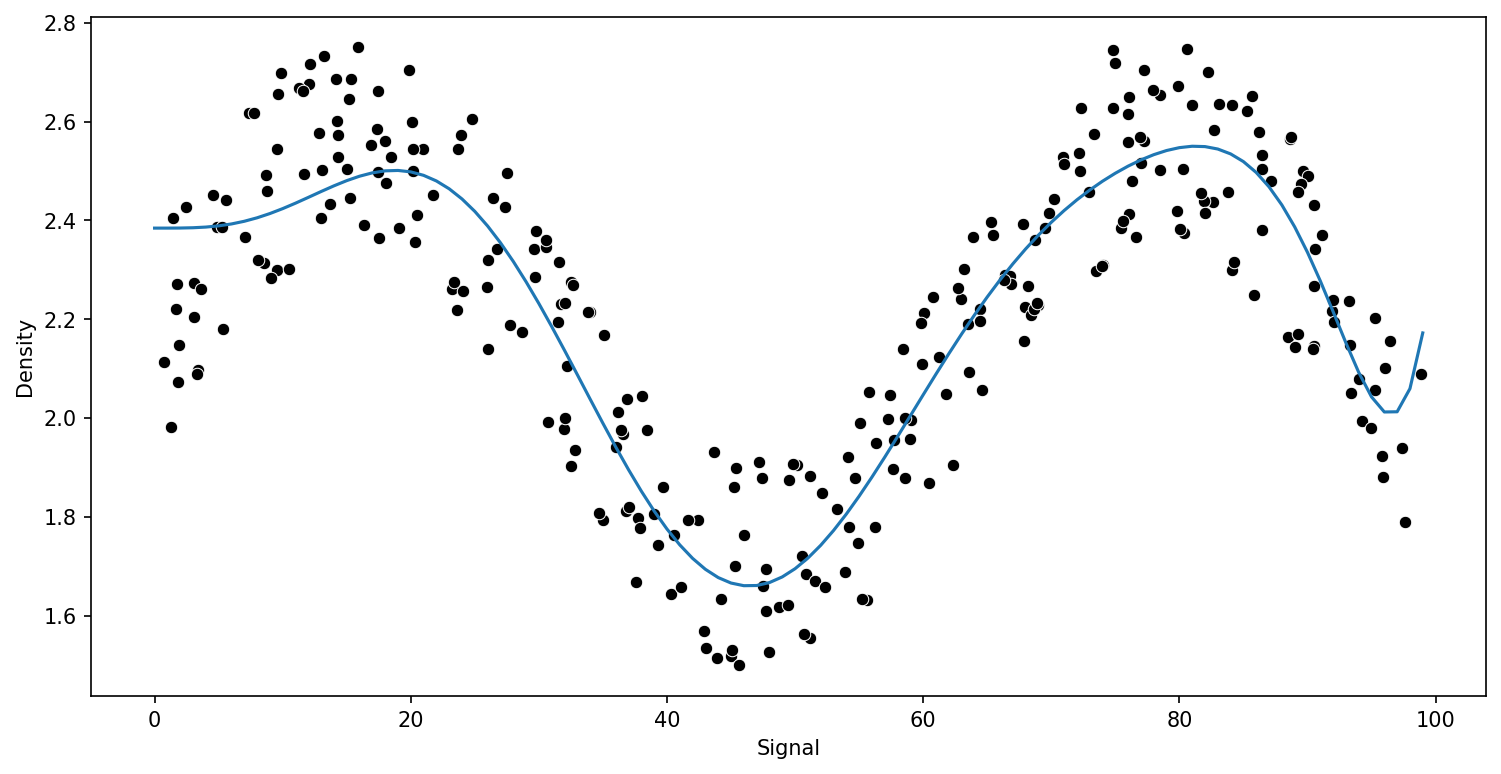

In [26]:
pipe = make_pipeline(PolynomialFeatures(10), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

## Régression KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


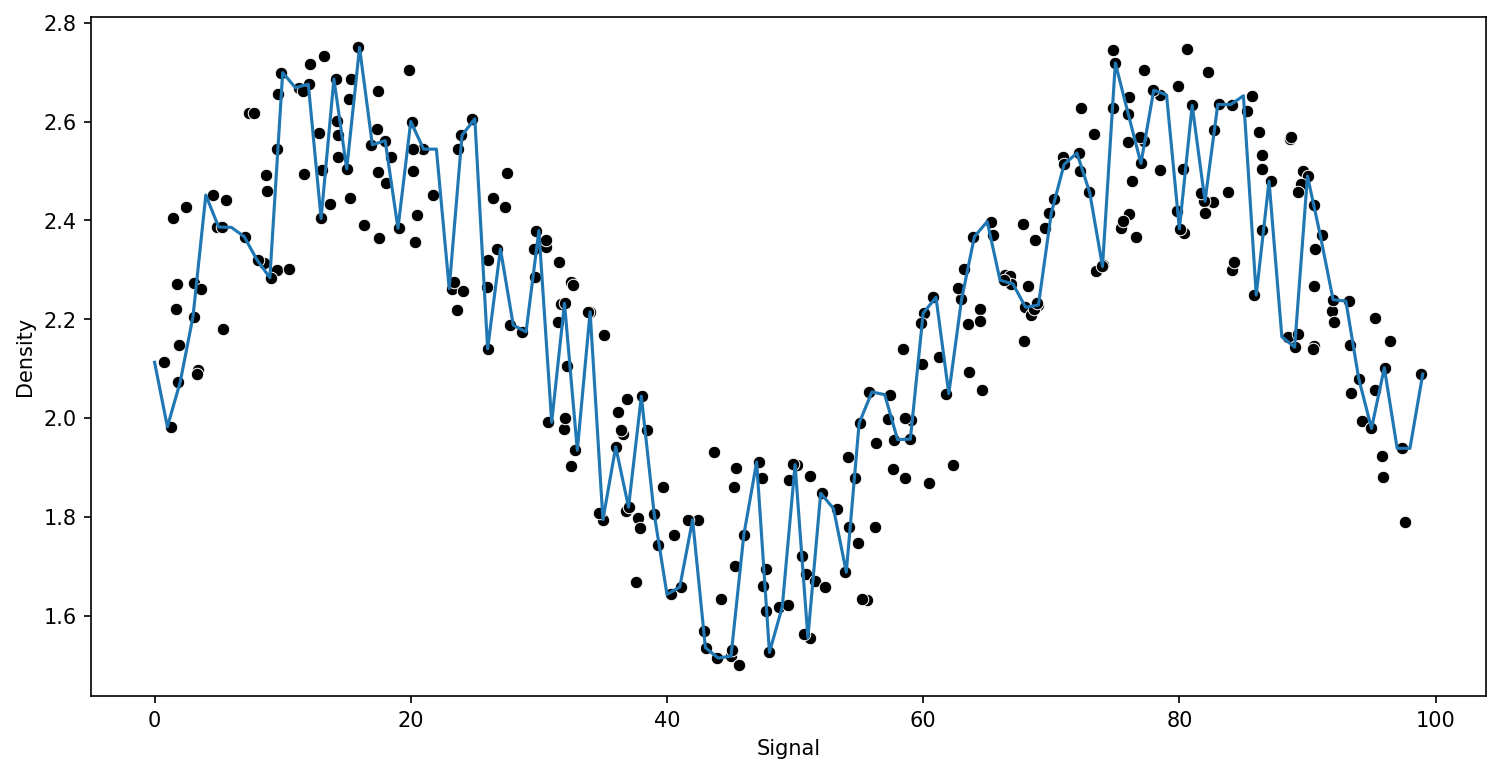

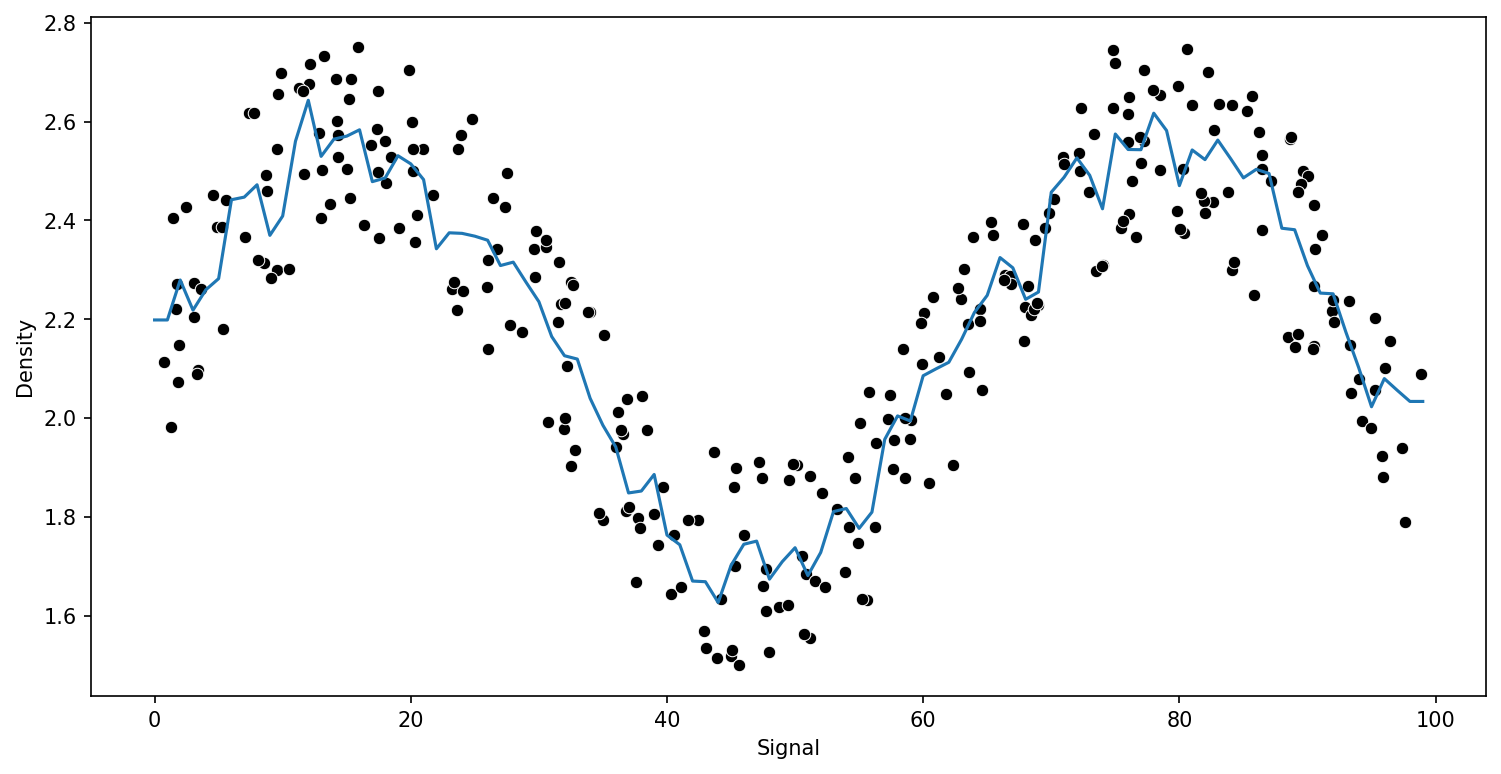

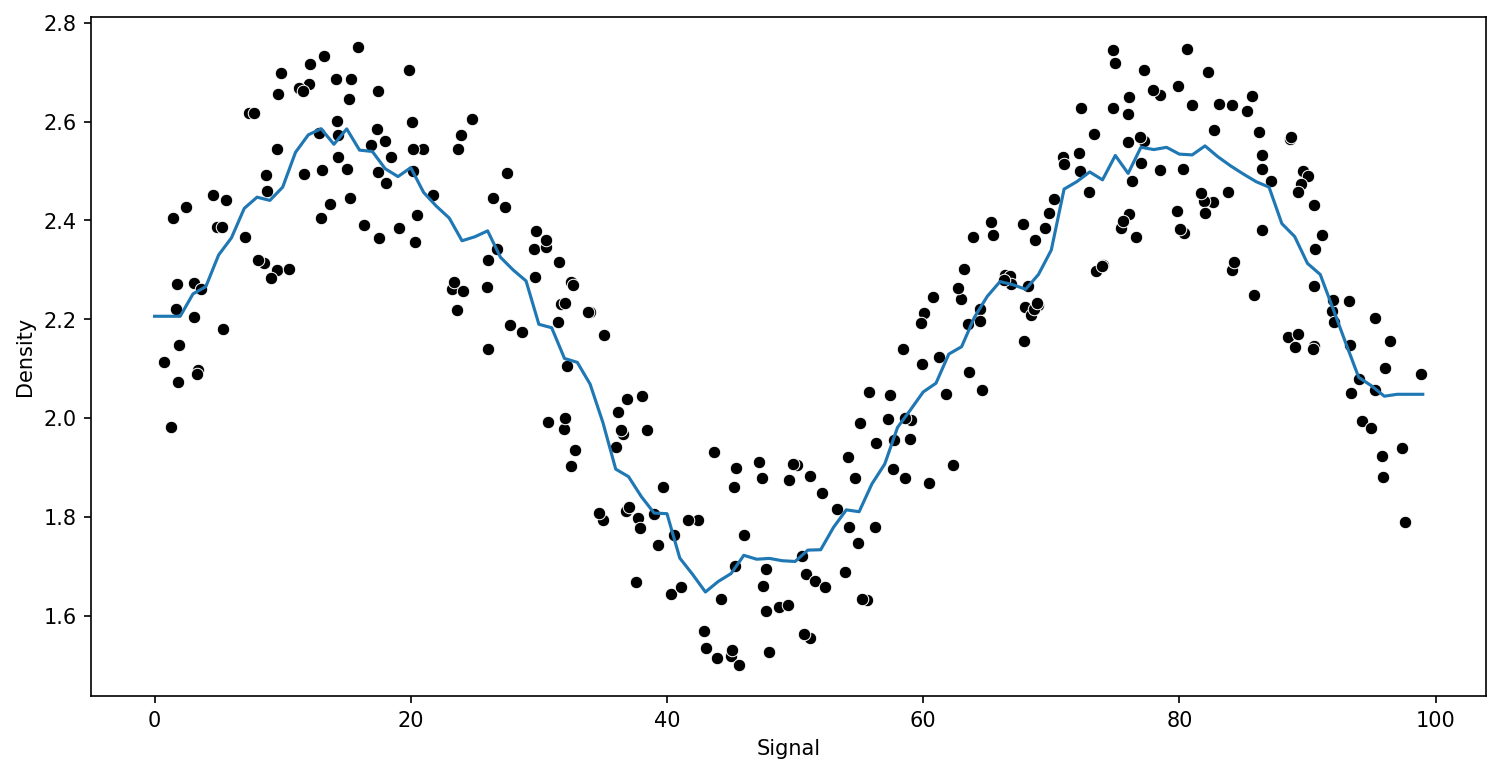

In [28]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

## Régression Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


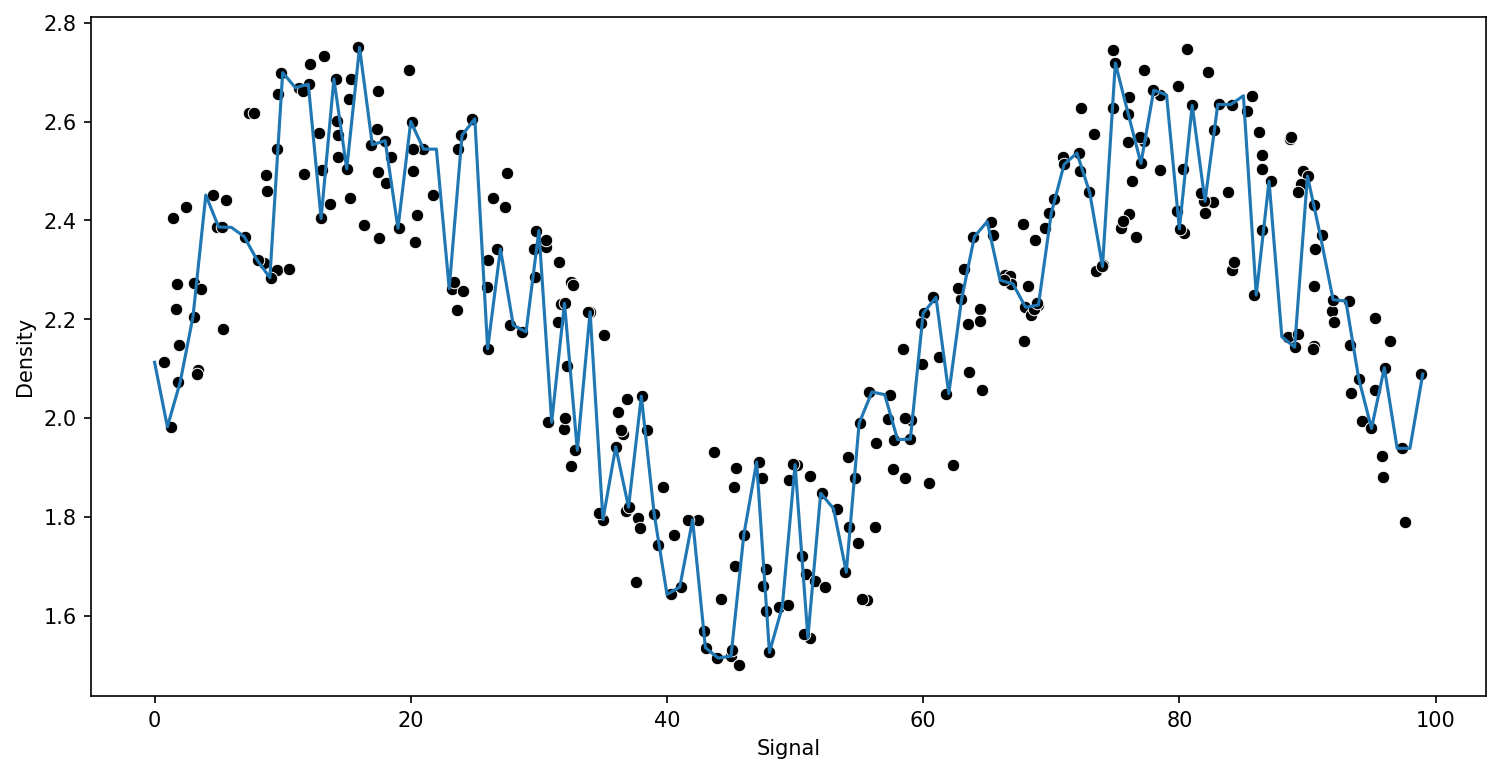

In [30]:
model = DecisionTreeRegressor()

run_model(model, X_train, y_train, X_test, y_test)

In [31]:
model.get_n_leaves()

270

## Support Vector Regression

In [32]:
from sklearn.svm import SVR

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000], 'gamma':['auto','scale']}
svr = SVR()

In [35]:
grid = GridSearchCV(svr, param_grid)

RMSE : 0.12646999302047557


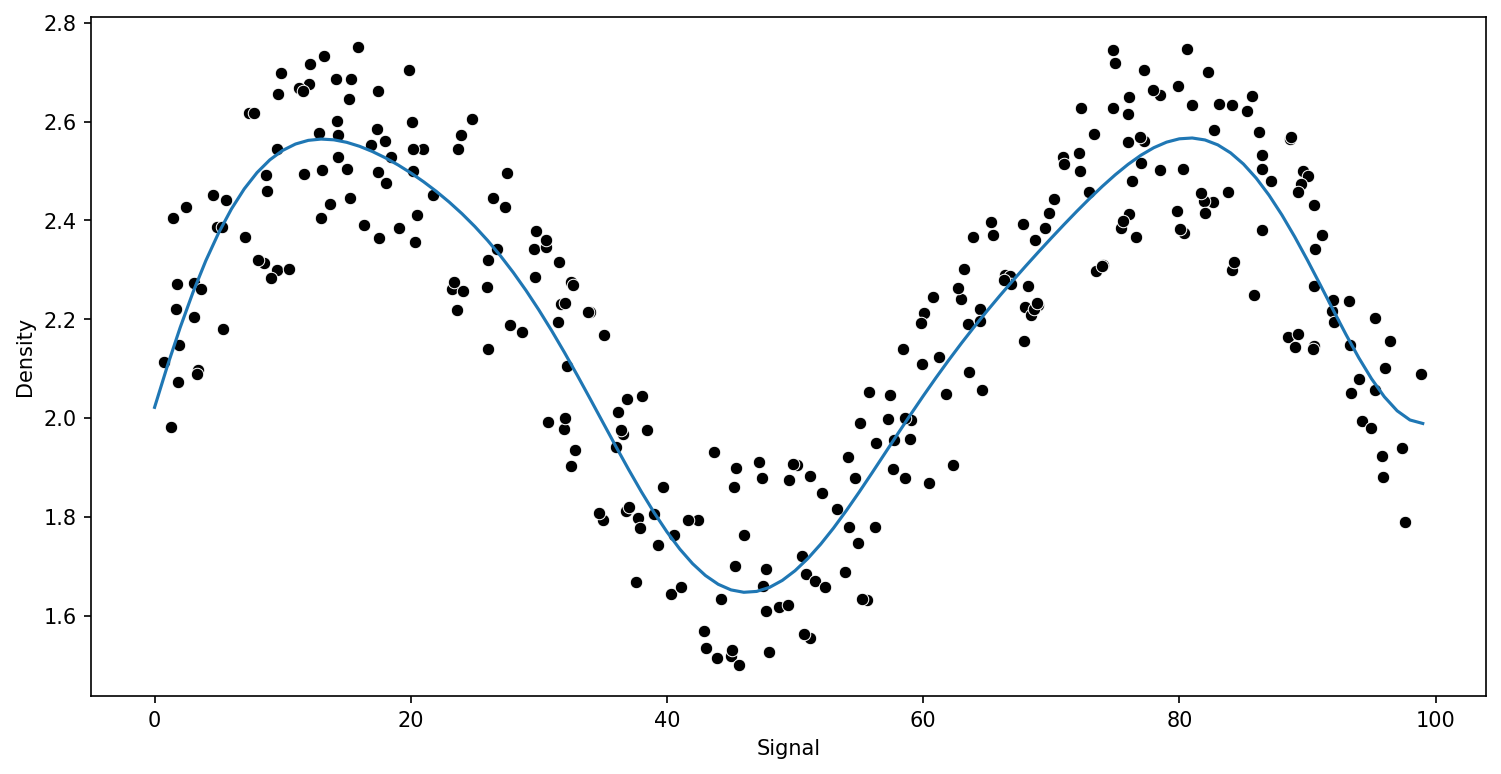

In [36]:
run_model(grid, X_train, y_train, X_test, y_test)

In [37]:
grid.best_estimator_

SVR(C=1000)

## Régression Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# help(RandomForestRegressor)

RMSE : 0.1420538073466328
RMSE : 0.12994097140503535
RMSE : 0.13016922682810048


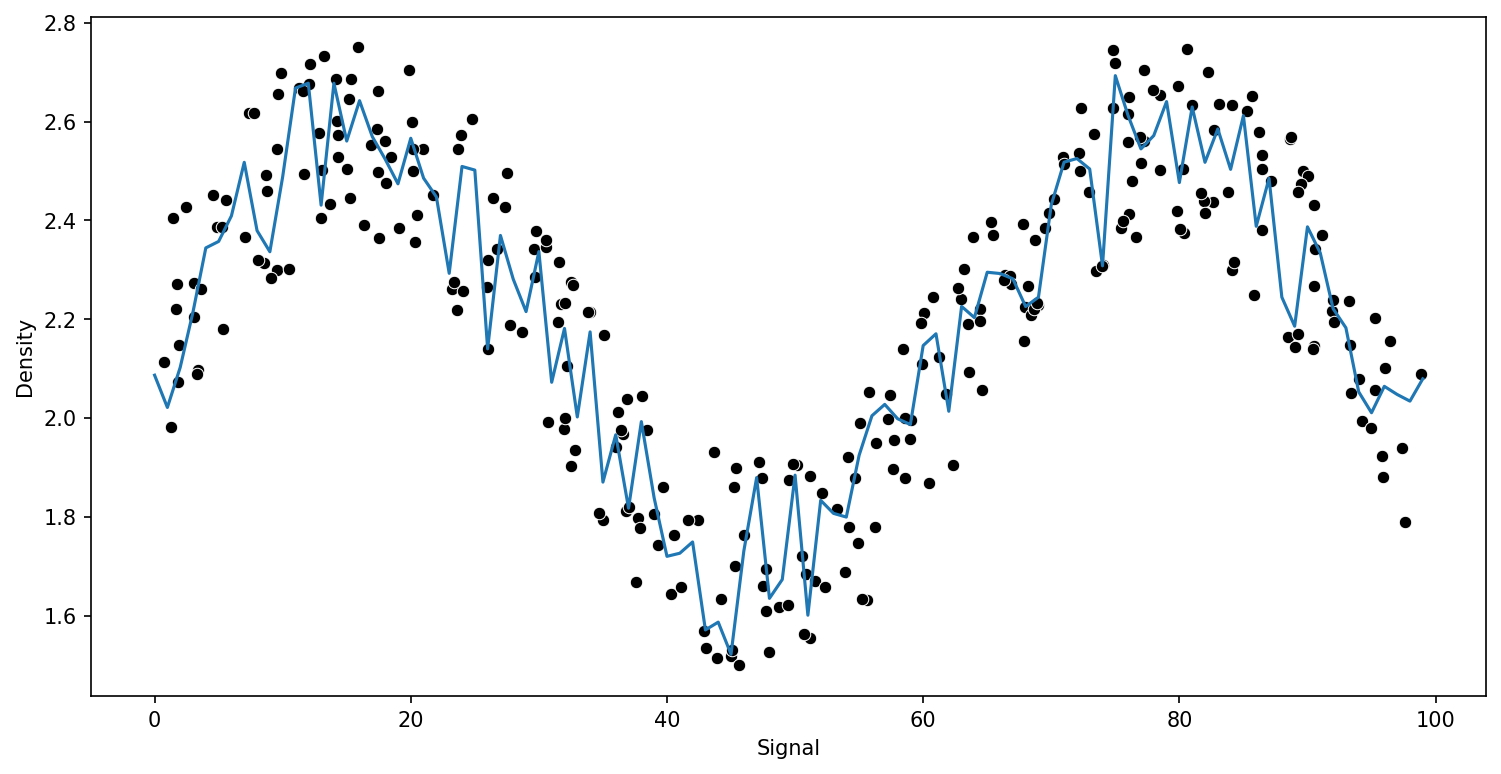

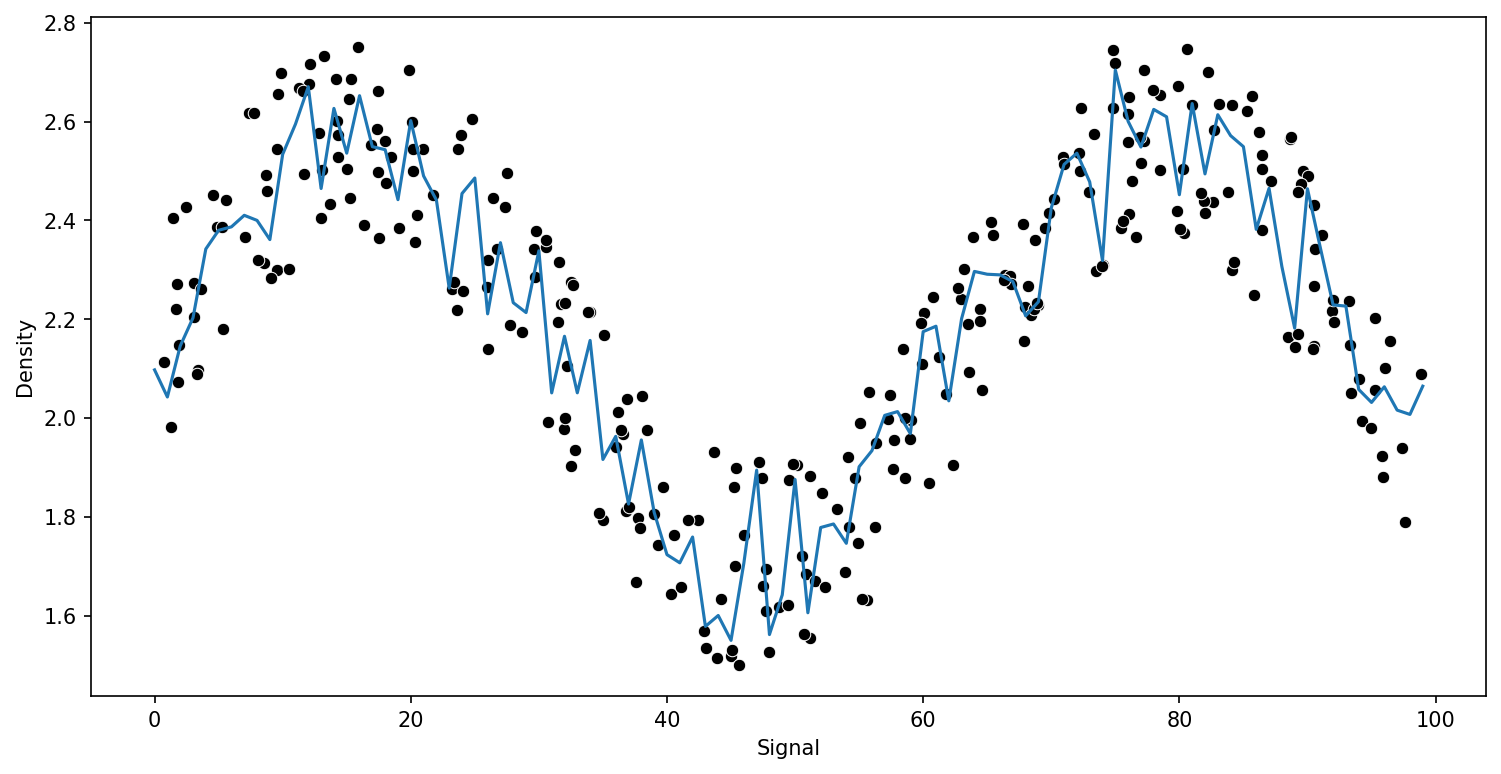

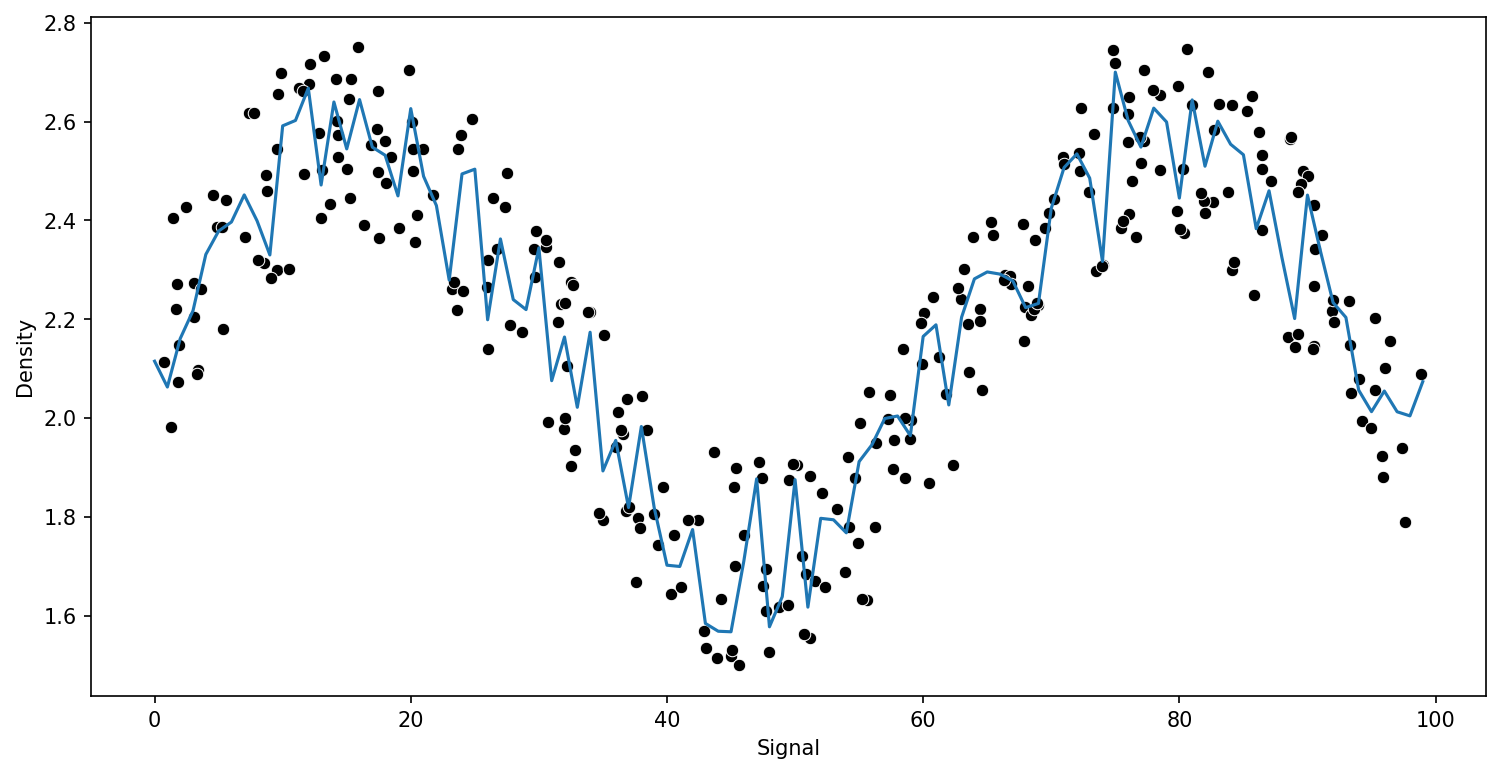

In [40]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train, y_train, X_test, y_test)

## Gradient Boosting

Nous y reviendrons plus en détail dans la section suivante.

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


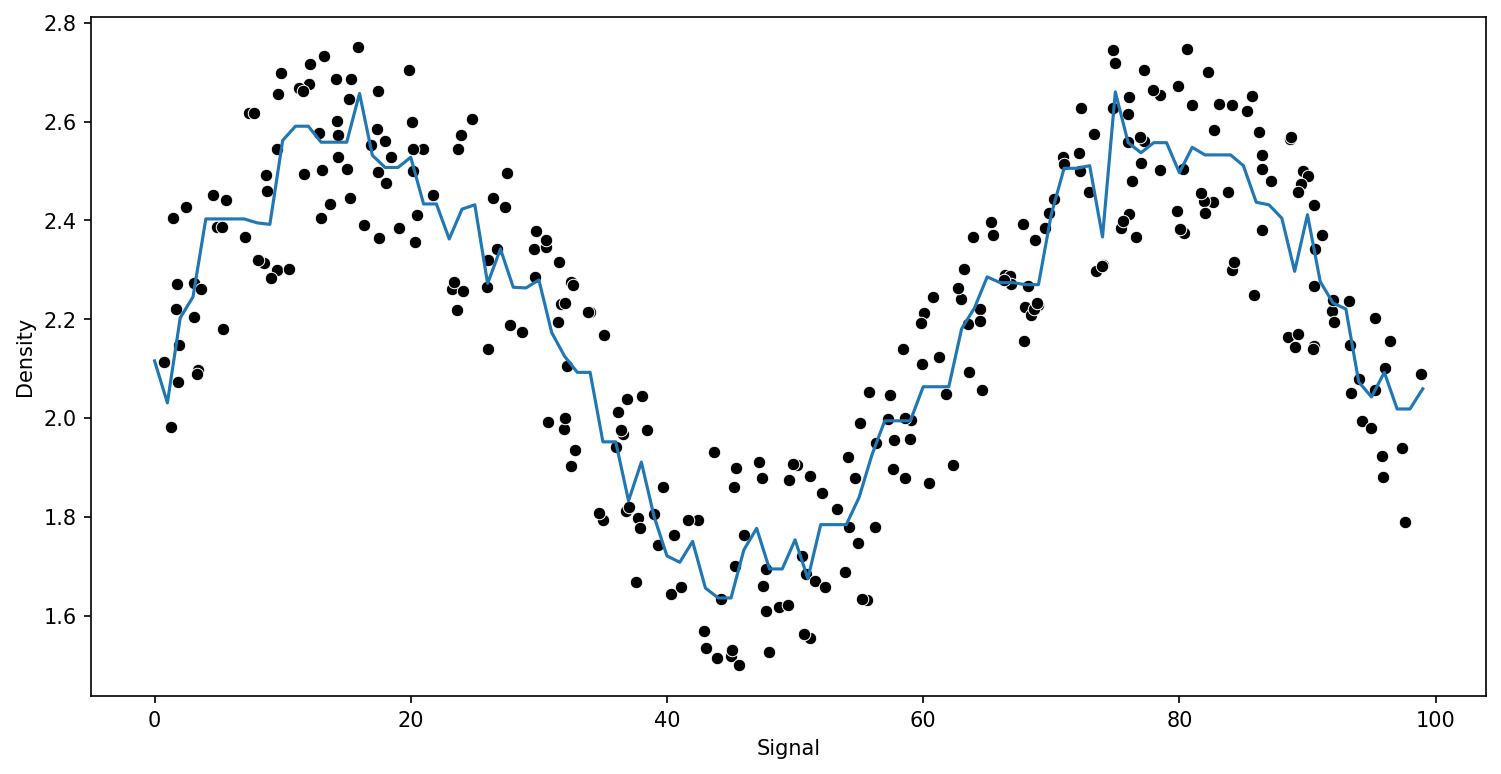

In [43]:
model = GradientBoostingRegressor()

run_model(model, X_train, y_train, X_test, y_test)

## Adaboost

In [44]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13294148649584667


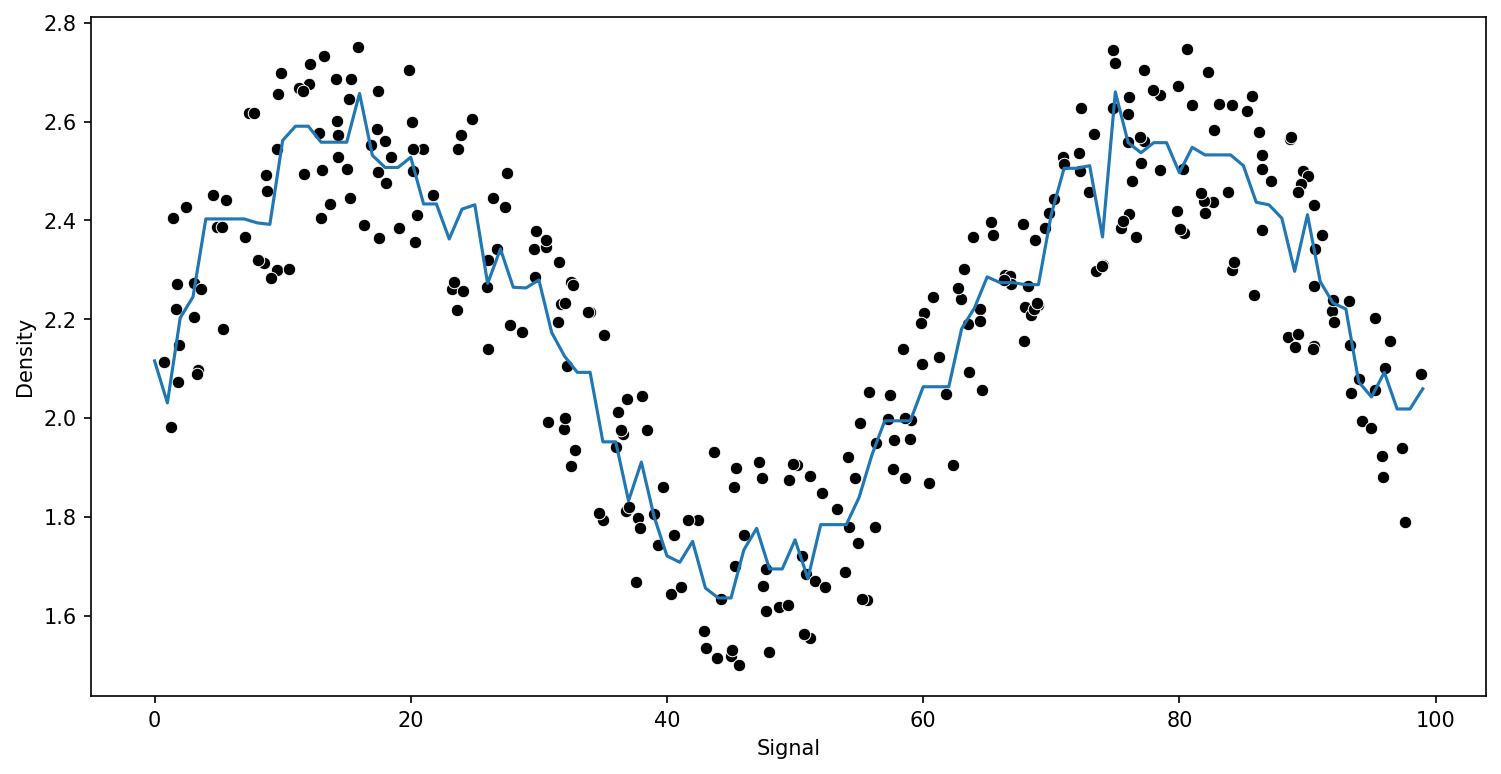

In [45]:
model = GradientBoostingRegressor()

run_model(model, X_train, y_train, X_test, y_test)